# KNN

 A classified data set, the feature column names are hidden but the data and the target classes are given.
applying the KNN model that predicts a class directly for a new data.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('Classified Data', index_col=0) # set index_col to use  the first column as the index

In [3]:
df.head()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## standardize the Variables 

KNN predicts the labels based on the fact that which observations that are near to the target class, that is why the scale of the data is important, the data should be stadardize so all the variables have the same impact on the obesrevations.

In [4]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()


In [7]:
# computing the mean and the std. dev. of each feature
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
# scaling the features, which means, subtracting the mean and dividing by 
# the standard dev. for each feature
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [9]:
print(type(scaled_features))

<class 'numpy.ndarray'>


In [10]:
# scaled_feature is a numpy array and we have to convert it into DF
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Test Train split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
       scaled_features, df['TARGET CLASS'], test_size=0.3)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=1) # using k=1 nearest neighbor

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
predics = knn.predict(X_test)

# Evaluation

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(y_test, predics))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       146
           1       0.86      0.90      0.88       154

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [19]:
print(confusion_matrix(y_test, predics))

[[123  23]
 [ 16 138]]


In [20]:
train_predicts = knn.predict(X_train)

In [19]:
print(confusion_matrix(y_train, train_predicts))


[[346   0]
 [  0 354]]


In [21]:
print(classification_report(y_train, train_predicts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       1.00      1.00      1.00       346

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



# Choosing K value
Using elbowMethod

In [22]:
# Choosing the best k, using elbow method

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

(-0.9000000000000001, 40.9, 0.067, 0.133)

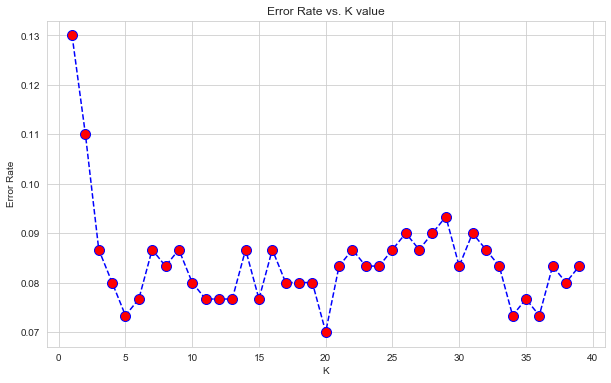

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.axis(color='white')



after k=20 the error rate is increasing and at the k=20 is the least

In [24]:

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)
pred =knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test, pred))


WITH K=1


[[123  23]
 [ 16 138]]


              precision    recall  f1-score   support

           0       0.88      0.84      0.86       146
           1       0.86      0.90      0.88       154

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [30]:
#with k=23

knn =KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train, y_train)
pred =knn.predict(X_test)

print('WITH K=20')
print('\n')
print(classification_report(y_test, pred))

WITH K=20


              precision    recall  f1-score   support

           0       0.94      0.91      0.93       146
           1       0.92      0.95      0.93       154

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

